<a href="https://colab.research.google.com/github/gisandnes/Extreme-Gradient-Boosting-with-XGBoost_DataCamp/blob/master/Decision_trees_as_base_learners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Decision trees as base learners

Decision trees as base learners

In [1]:
!mkdir -p data #Make folders for downloads

#!wget --no-verbose https://raw.githubusercontent.com/gisandnes/Extreme-Gradient-Boosting-with-XGBoost_DataCamp/master/data/chronic_kidney_disease.csv -O ./data/chronic_kidney_disease.csv
#!wget --no-verbose https://raw.githubusercontent.com/gisandnes/Extreme-Gradient-Boosting-with-XGBoost_DataCamp/master/data/ames_unprocessed_data.csv -O ./data/ames_unprocessed_data.csv 
!wget --no-verbose https://raw.githubusercontent.com/gisandnes/Extreme-Gradient-Boosting-with-XGBoost_DataCamp/master/data/ames_housing_trimmed_processed.csv -O ./data/ames_housing_trimmed_processed.csv

2019-01-11 09:17:14 URL:https://raw.githubusercontent.com/gisandnes/Extreme-Gradient-Boosting-with-XGBoost_DataCamp/master/data/ames_housing_trimmed_processed.csv [196754/196754] -> "./data/ames_housing_trimmed_processed.csv" [1]


In [0]:
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import xgboost as xgb

%matplotlib inline

In [335]:
ames_processed  = pd.read_csv("./data/ames_housing_trimmed_processed.csv")

display(ames_processed.describe())

features = ames_processed.loc[:,"MSSubClass":"PavedDrive_Y"]
response = ames_processed.loc[:,"SalePrice"]

colnames = features.columns.tolist()
#list(features.columns)

print("Column names: {}".format(colnames))

X = features.values #Numpy array
y = response.values #Numpy array

print("X.shape: {}".format(X.shape))
print("y.shape: {}".format(y.shape))

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,Remodeled,GrLivArea,BsmtFullBath,BsmtHalfBath,...,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,PavedDrive_P,PavedDrive_Y,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,0.476712,1515.463699,0.425342,0.057534,...,0.009589,0.497260,0.005479,0.007534,0.304795,0.025342,0.044521,0.020548,0.917808,180921.195890
std,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,0.499629,525.480383,0.518911,0.238753,...,0.097486,0.500164,0.073846,0.086502,0.460478,0.157217,0.206319,0.141914,0.274751,79442.502883
min,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,0.000000,334.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,0.000000,1129.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,129975.000000
50%,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,0.000000,1464.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,1.000000,1776.750000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,1.000000,5642.000000,3.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,755000.000000


Column names: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'Remodeled', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageArea', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle

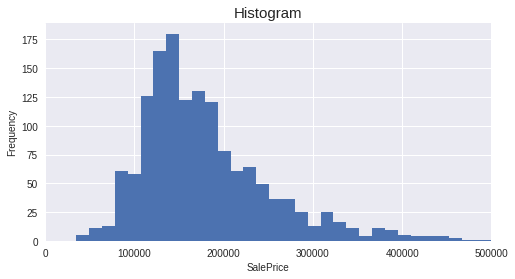

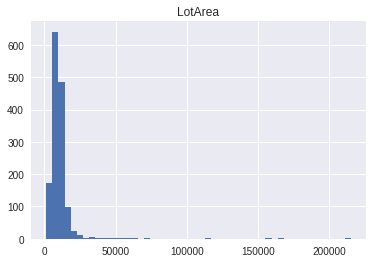

In [336]:
plt.figure(figsize=(8, 4))
response.hist(bins=50)
plt.title("Histogram",fontsize=15)
plt.xlabel("SalePrice",fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.xlim([0.0,500000.0])
plt.show()

fig = features.hist(column='LotArea', bins=50)

In [337]:
# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective="reg:linear", booster="gbtree", n_estimators=10, seed=123)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

RMSE: 78847.401758


importances_dict= {'LotArea': 0.08571429, 'OverallQual': 0.35714287, 'YearBuilt': 0.057142857, 'GrLivArea': 0.27142859, 'BsmtFullBath': 0.028571429, 'FullBath': 0.014285714, 'Fireplaces': 0.057142857, 'GarageArea': 0.1, 'MSZoning_RL': 0.014285714, 'HouseStyle_1Story': 0.014285714}



,Variable,Importance
1,OverallQual,0.357143
3,GrLivArea,0.271429
7,GarageArea,0.100000
0,LotArea,0.085714
6,Fireplaces,0.057143
2,YearBuilt,0.057143
4,BsmtFullBath,0.028571
5,FullBath,0.014286
9,HouseStyle_1Story,0.014286
8,MSZoning_RL,0.014286


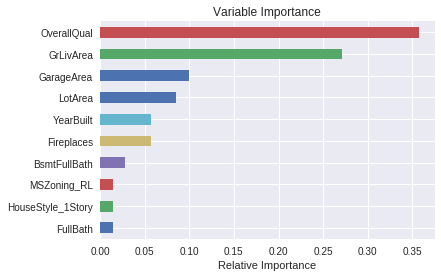

In [338]:
importances0 = xg_reg.feature_importances_

importances = pd.DataFrame(list(zip(colnames, importances0)), columns = ['Variable', 'Importance'])
importances = importances[importances.Importance != 0].sort_values(by=['Importance', 'Variable' ], ascending = [True, True])

#Alternative: Create dictionary
importances_dict = {name: value for name, value in zip(colnames, importances0) if value != 0}
print('importances_dict= {}\n'.format(importances_dict))
importances2 = pd.DataFrame(list(importances_dict.items()), columns = ['Variable', 'Importance']).sort_values(by=['Importance', 'Variable' ], ascending = [False, True])
display(importances2)
#print(importances2.to_string(index=False, header=False))

ax = importances.plot.barh(x='Variable', y='Importance')
p1 = plt.title('Variable Importance')
p1 = plt.xlabel('Relative Importance')

ax.get_legend().remove()
#p1 = ax.set_title(label='')
p1 = ax.set_ylabel(ylabel='')

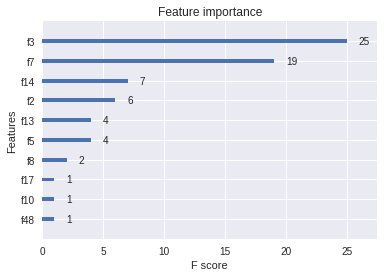

In [339]:
p2 = xgb.plot_importance(xg_reg)
# No feature names: https://stackoverflow.com/questions/46943314/xgboost-plot-importance-doesnt-show-feature-names

In [340]:
print("xg_reg.get_booster= {}".format(xg_reg.get_booster()))
print("xg_reg.get_params= {}".format(xg_reg.get_params()))
print("xg_reg.get_xgb_params= {}".format(xg_reg.get_xgb_params()))
print("xg_reg.score(X_test, y_test)= {}".format(xg_reg.score(X_test, y_test)))

xg_reg.get_booster= <xgboost.core.Booster object at 0x7f9bf3e03128>
xg_reg.get_params= {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 10, 'n_jobs': 1, 'nthread': None, 'objective': 'reg:linear', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 123, 'silent': True, 'subsample': 1}
xg_reg.get_xgb_params= {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 10, 'nthread': 1, 'objective': 'reg:linear', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 123, 'silent': 1, 'subsample': 1}
xg_reg.score(X_test, y_test)= -0.006035615328578103


In [347]:
#XGBoost Learning API 
data_train = xgb.DMatrix(data=X_train, label=y_train, feature_names=colnames)
data_test  = xgb.DMatrix(data=X_test,  label=y_test,  feature_names=colnames)

# Default parameters differ tbetween XGBoost Scikit-Learn API and XGBoost Learning API:
#    xg_reg2 = xgb.XGBRegressor(objective="reg:linear", booster="gbtree", n_estimators=10, seed=123)
params = {'objective':'reg:linear', 'booster':'gbtree', 'num_boost_round':10, 'seed':123 , 'max_depth':3, 'learning_rate':0.1} 

# Fit the regressor to the training set
#   xg_reg2.fit(data_train)
xg_reg2 = xgb.train(params=params, dtrain=data_train)

# Predict the labels of the test set: preds
preds2 = xg_reg2.predict(data=data_test)

# Compute the rmse: rmse
rmse2 = np.sqrt(mean_squared_error(data_test.get_label(),preds2))
print("RMSE: %f" % (rmse2))

RMSE: 78847.406250
